<center><a target="_blank" href="https://academy.constructor.org/"><img src=https://lh3.googleusercontent.com/d/1EmH3Jks5CpJy0zK3JbkvJZkeqWtVcxhB width="800" style="background:none; border:none; box-shadow:none;" /></a> </center>
<hr />

# <h1 align="center"> Day2: Inference Schools </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>Constructor Academy, 2025</center>

## Likelihood

A scientist was studying predation data for Hyperolius spinigularis (Vonesh and Bolker 2005), an African reed frog in lakes. During the experiment some frogs were left in water tanks along with a fixed concentration of waterbugs and dragonfly larves (predators).
  
Load the dataset from the provided csv file. For more information about the dataset you can visit:
https://rdrr.io/cran/emdbook/man/Reedfrog.html

The dataset contains the following columns:

* density = initial tadpole density (number of tadpoles in a 1.2 x 0.8 x 0.4 m tank)
* pred = factor: predators present or absent
* size = factor: big or small tadpoles
* surv = number surviving
* propsurv = proportion surviving (=surv/density)



In [2]:
import pandas as pd

In [3]:
rfp = pd.read_csv("/Users/szewing/Desktop/Course/CDBootcamp/debbie_to/02_Statistics/day2/reed_frog.csv", index_col=0)
print(len(rfp))
rfp.head()

48


,density,pred,size,surv,propsurv
1,10,no,big,9,0.9
2,10,no,big,10,1.0
3,10,no,big,7,0.7
4,10,no,big,10,1.0
5,10,no,small,9,0.9


For the purpose of this tutorial we are interested in finding out the probability of death for tanks where there was a predator (``rfp[rfp["pred"]=="pred"]``) and only for small frogs (``rfp[rfp["size"]=="small"]``) and a total initial frog concentration of 10. This dataset can be selected as

In [4]:
rf_sub = rfp[(rfp["pred"]=="pred") & (rfp["size"]=="small") & (rfp["density"]==10)].copy()      # copy so as to not replacing dataset
print(len(rf_sub))
rf_sub

4


,density,pred,size,surv,propsurv
13,10,pred,small,7,0.7
14,10,pred,small,5,0.5
15,10,pred,small,9,0.9
16,10,pred,small,9,0.9


Let's get for this subset the number of frogs that got killed:

In [5]:
rf_sub["killed"] = rf_sub["density"] - rf_sub["surv"]

## Estimate the probability of death
**The goal of this exercise is to estimate the probability of death given the frog type small and an initial density of N=10**

For each individual, the _**per-trial probability**_ of being eaten is a binomial process (survive or die). The likelihood of binomial distributed data is given by

$L(k|p, N) = \binom{N}{k}p^{k}(1-p)^{N-k}$

In class we have already seen this formula and an example on how we can find all our unknowns (N = 10, k = number of killed frogs, p = success probability). N and k are known. p is what we are trying to estimate. For a single observation the formula above holds true. However, if we have multiple observations (in this example we assume that they are all independent) the likelihood function becomes the **product of all likelihoods** (we basically multiple all likelihoods). This gives us the total likelihood of observing our data.

$L = \prod_{i=1}^{n}\binom{N}{k_{i}}p^{k_{i}}(1-p)^{N-k_{i}}$

Likelihood function is usually solved by taking the log on both sides (this makes calculations easier, called log-likelihood). The log-likelihood is defined as:

$LL = \sum_{i=1}^{n}\left [log\binom{N}{k_{i}}+k_{i}log(p)+(N-k_{i})log(1-p) \right ]$


In Python we can callculate this likelihood for binomial data using **``binom.logpmf`` from the ``scipy.stats`` package**. Consequently we take the sum over all data points.

In [12]:
from scipy.stats import binom
import numpy as np

In [ ]:
p = 0.5

np.sum(binom.logpmf(k=rf_sub["killed"], n=rf_sub["density"], p=p))          # after taking log, multiplication becomes a sum.

# the output shows the value of loglikelihood when p=0.5.

np.float64(-12.803796206116246)

### Brute Force Method


One simple method to find the "optimal" p is using a brute-force approach. For this we take multiple p values (in the range of 0 to 1) and calculate the likelihood for all different values of p. The value for p that gives the best likelihood is the right one. This can be done as follows:

In [8]:
p_vec = np.arange(0.01, 1.01, step=0.01)
lik = np.zeros(100)

for i, p in enumerate(p_vec):
    lik[i] = np.prod(binom.pmf(k=rf_sub["killed"], n=rf_sub["density"], p=p))


In [10]:
from matplotlib import pyplot as plt

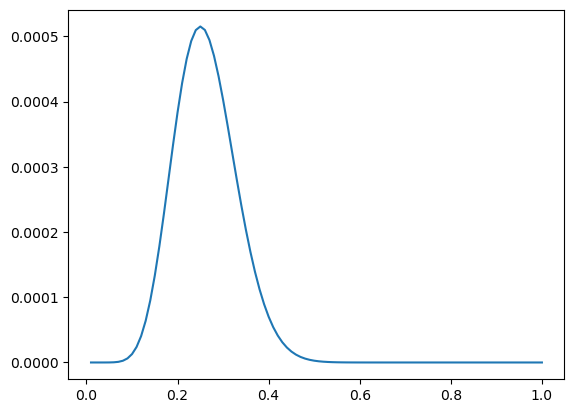

In [11]:
plt.plot(p_vec, lik)

## Exercise 1

Adapt the code above to calculate the log-likelihood and estimate the value of p that maximizes the log-likelihood

Best value: p=0.25


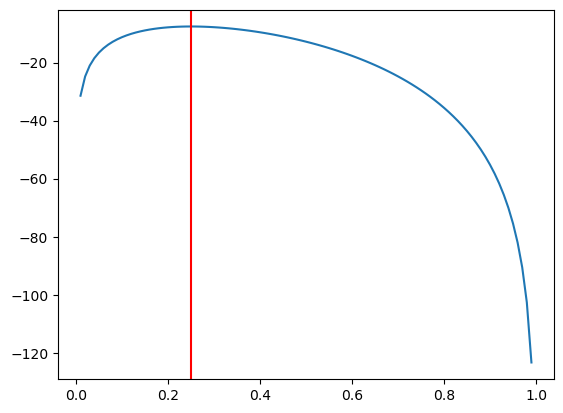

In [ ]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

p_vec = np.arange(0.01, 1.01, step=0.01)
loglik = np.zeros(100)

for i, p in enumerate(p_vec):
    loglik[i] = np.sum(binom.logpmf(k=rf_sub["killed"], n=rf_sub["density"], p=p))

max_p = p_vec[np.argmax(loglik)]
print(f"Best value: p={max_p}")

plt.plot(p_vec, loglik)
plt.yscale('linear')
plt.axvline(x = max_p, color = 'r', linestyle = '-')

In [ ]:
# Your code here


## MLE based example

Alternatively we can use an optimizer to esimate the correct value of our parameter p. An MLE (mximum likelihood estimation) based approach requires you to explicity provide the likelihood function as shown below.

We will use the minimizer from the ``scipy.optimize`` package. Since this is trying to minimize a given function we need to use the negative log-likelihood.

In [22]:
from scipy.optimize import minimize

In [ ]:
def neg_LL(p):  # negative log likelihood
  LL = np.sum(binom.logpmf(k=rf_sub["killed"], n=rf_sub["density"], p=p[0]))
  neg_LL = -LL
  return neg_LL

In [ ]:
mle_model = minimize(neg_LL, x0=.5, bounds=[(1e-10, 1-1e-10)])
mle_model

      fun: 7.5713147684707724
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([0.25])

## Exercise 2


Adapt the code from above to select tanks with predators  (``rfp[rfp["pred"]=="pred"]``) and a total initial frog concentration of N=10 but this time only for big frogs (``rfp[rfp["size"]=="big"]``) to answer the question **whether bigger frogs have a higher survival probability**?

In [25]:
rf_sub_b = rfp[(rfp["pred"]=="pred") & (rfp["size"]=="big") & (rfp["density"]==10)].copy()      # copy so as to not replacing dataset
print(len(rf_sub_b))

rf_sub_b['killed'] = rf_sub_b['density'] - rf_sub_b['surv']
rf_sub_b

4


,density,pred,size,surv,propsurv,killed
9,10,pred,big,4,0.4,6
10,10,pred,big,9,0.9,1
11,10,pred,big,7,0.7,3
12,10,pred,big,6,0.6,4


In [26]:
# Your code here
p = 0.5

np.sum(binom.logpmf(k=rf_sub_b["killed"], n=rf_sub_b["density"], p=p))

np.float64(-9.941595325186778)

Best value: p=0.35000000000000003


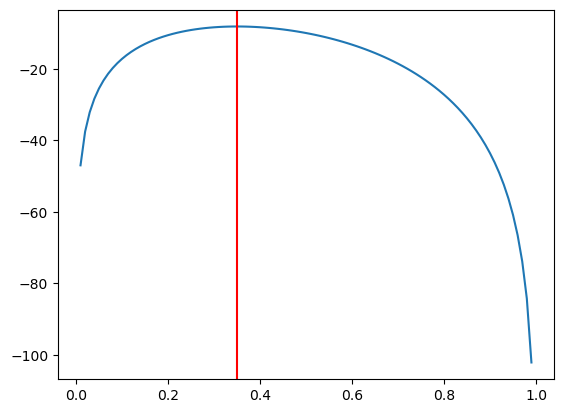

In [27]:
p_vec = np.arange(0.01, 1.01, step=0.01)
loglik = np.zeros(100)

for i, p in enumerate(p_vec):
    loglik[i] = np.sum(binom.logpmf(k=rf_sub_b["killed"], n=rf_sub_b["density"], p=p))

max_p = p_vec[np.argmax(loglik)]
print(f"Best value: p={max_p}")

plt.plot(p_vec, loglik)
plt.yscale('linear')
plt.axvline(x = max_p, color = 'r', linestyle = '-')

**Conclusion**: The best guess for p is now p=0.35. This shows that **bigger frogs have a higher risk of beeing killed**.

## Bayesian Parameter Estimation

Bayesian estimation always requires a prior. When no previous knowledge about the data is available (which is never the case) a non-informative prior can be used. In the code below a uniform prior which is non-informative is shown.


In [ ]:
from scipy.stats import uniform

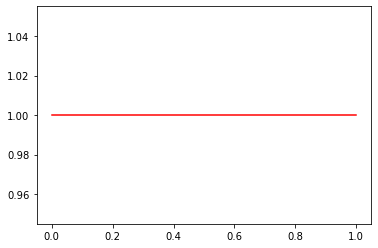

In [ ]:
p_vec = np.arange(0, 1.01, step=0.01)
p_uni = uniform.pdf(p_vec)

plt.plot(p_vec, p_uni, "r")

**Binomial distributet data has the beta distribution as its conjugate prior**.
A beta prior can itself be non-informative. Here is an example of non-informative beta prior

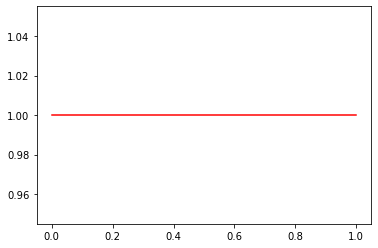

In [ ]:
from scipy.stats import beta

p_vec = np.arange(0, 1.01, step=0.01)
p_beta = beta.pdf(p_vec, 1, 1)

plt.plot(p_vec, p_beta, "r")

### A single data point

#### Brute Force Method of Bayesian estimation

To understand things better let's first focus on a single example. The scientist counted the number of frogs in one tank that at the start of the experiement contained 10 frogs and found that 3 of them were missing.

In [ ]:
k_killed = 3

param_space = np.arange(0, 1.001, step=0.001)
likelihood = binom.pmf(k=k_killed, n=10, p=param_space)

###########
# Brute-force Bayes

####
# prior across parameter space
prior = beta.pdf(param_space, a=1, b=1)

######
## Numerator for Bayes rule: weight the data likelihood by the prior
weighted_likelihood = likelihood*prior      # Numerator for Bayes rule

######
## Denominator for Bayes rule: compute normalization constant
normalization_constant = np.sum(weighted_likelihood)/len(param_space)   # "evidence" is a single constant number: the sum of the weighted likelihoods!

######
## Posterior!! (numerator/denominator)
posterior = weighted_likelihood/normalization_constant   # this is Bayes' rule!


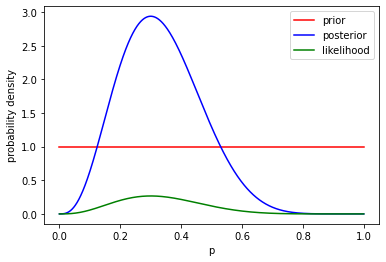

In [ ]:
# Plot it out!

plt.plot(param_space, prior, "r", label="prior")
plt.plot(param_space, posterior, "b", label="posterior")
plt.plot(param_space, likelihood, "g", label="likelihood")
plt.legend()
plt.xlabel("p")
plt.ylabel("probability density")
None

The posterior has a shape very similar to that of the likelihood this means that prior has been overwhelmed by the information provided by the data.


#### Informative prior

In [ ]:
#############
# Try an informative prior!
prior = beta.pdf(param_space, a=15, b=5)

######
## Numerator for Bayes rule: weight the data likelihood by the prior
weighted_likelihood = likelihood*prior      # Numerator for Bayes rule

######
## Denominator for Bayes rule: compute normalization constant
normalization_constant = np.sum(weighted_likelihood)/len(param_space)   # "evidence" is a single constant number: the sum of the weighted likelihoods!

######
## Posterior!! (numerator/denominator)
posterior = weighted_likelihood/normalization_constant   # this is Bayes' rule!


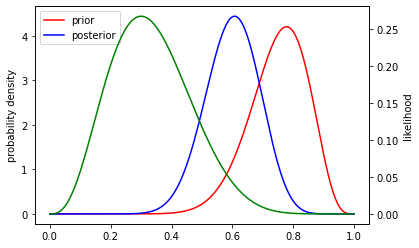

In [ ]:
# Plot it out!
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(param_space, prior, "r", label="prior")
ax1.plot(param_space, posterior, "b", label="posterior")
ax2.plot(param_space, likelihood, "g", label="likelihood")
ax1.legend()
plt.xlabel("p")
ax1.set_ylabel("probability density")
ax2.set_ylabel("likelihood")
None

Here we clearly see that posterior is nicely placed between our likelihood and prior. The posterial has a shape similar to the prior.


## Exercise 3

Your goal in this exercise is to add more experimental data and run againe the baysian estimation. The data vector has been provided to you.

It is justified to assume that the individual data points are statistically independent. For this reason we can calculate the total likelihood function as the product of all the individual samples.

What do you observe looking at the resulting posterior distribution?

In [ ]:
# Collect more experimental data

k_killed = [3, 1, 6, 2, 3, 2, 6, 1, 3, 3]

# We use the same prior as before
prior = beta.pdf(param_space, a=15, b=5)

# Your code here:



In [ ]:
# Plot it out!
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(param_space, prior, "r", label="prior")
ax1.plot(param_space, posterior, "b", label="posterior")
ax2.plot(param_space, likelihood, "g", label="likelihood")
ax1.legend()
plt.xlabel("p")
ax1.set_ylabel("probability density")
ax2.set_ylabel("likelihood")
None

In this case we see that our posterior is closer to likelihood of data which makes sense as we have more data.

## Exercise 4
**Try a super informative prior**

Change the code above above to try even a more informative prior with a = 150 and b = 50.

In [ ]:
# We use the same prior as before
prior = beta.pdf(param_space, a=150, b=50)

# Your code here




In [ ]:
# Plot it out!
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(param_space, prior, "r", label="prior")
ax1.plot(param_space, posterior, "b", label="posterior")
ax2.plot(param_space, likelihood, "g", label="likelihood")
ax1.legend()
plt.xlabel("p")
ax1.set_ylabel("probability density")
ax2.set_ylabel("likelihood")
None

## Exercise 5

Bayesian confidence intervals are called **credible intervals**. Though you will learn more about confidence intervals in afternoon, there is no harm in estimating them already. Credible intervals basically tell us that we are 95% sure that the parameter value is between the lower and upper bound of this interval.

Your goal in this exercise is to estimate the credible interval for the case when we had one singel observation with k=3, and a non-informative prior with the a=1 and b=1.

You can use the following formular to get the posterior distribution:

$Posterior \propto Beta(a+k, b+N-k)$


In [ ]:
k_killed = 3
N = 10

# Your code here



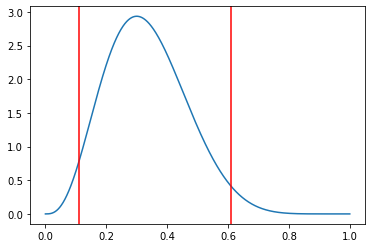

In [ ]:
plt.plot(param_space, posterior)

plt.axvline(x=credible_interval[0], color="r")
plt.axvline(x=credible_interval[1], color="r")
None

**Done!**